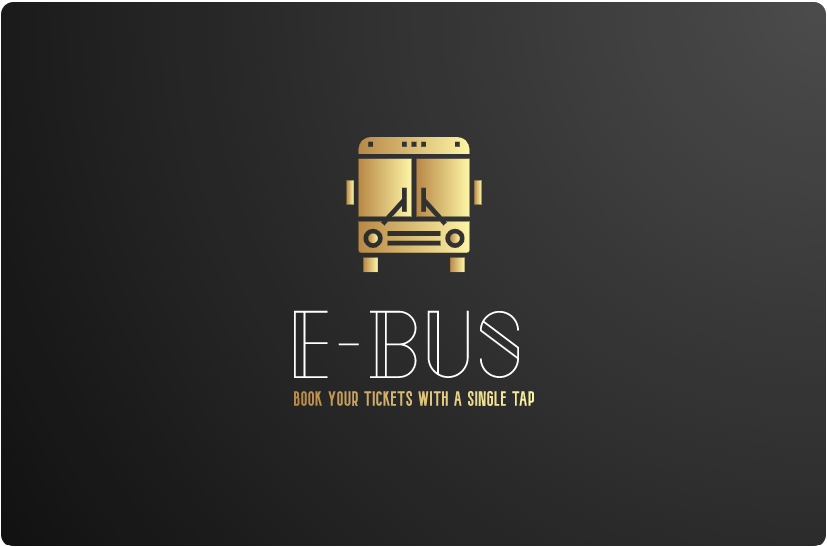

----------------------------------------------------------------------------------------
*****************************WELCOME TO E-BUS ONLINE PORTAL*****************************
----------------------------------------------------------------------------------------
STATION :---> Hyderabad 


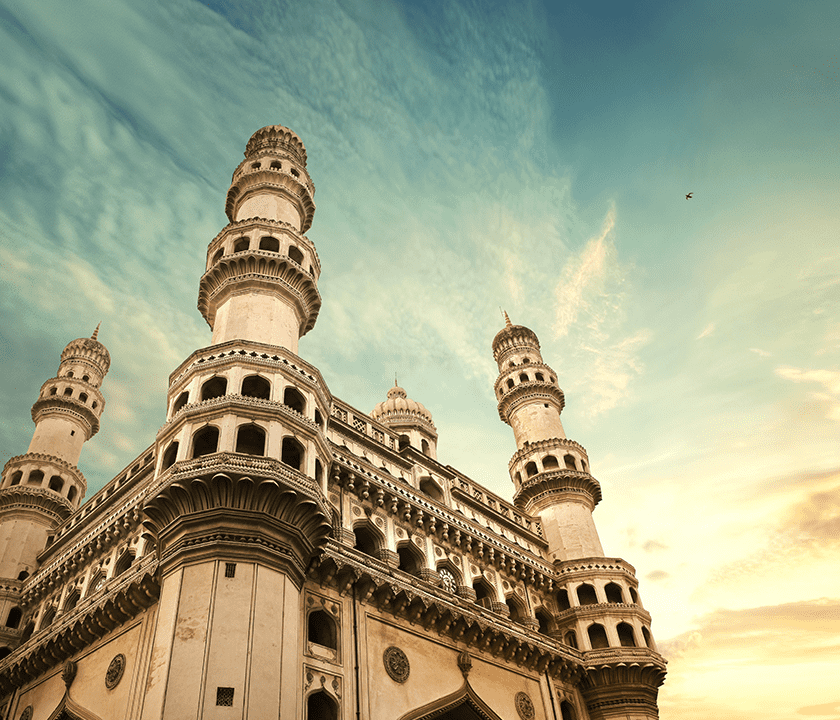

----------------------------------------------
Enter your name :---> Sadhvik Reddy
Enter your mobile no :---> 8688055330
----------------------------------------------
For Booking bus tickets Enter 1 : 1
Enter Journey Details : 
Available Destination places........
----------------------------------------------
bangalore
mysore
chennai
rajasthan
mumbai
goa
kanyakumari
delhi
agra
varanasi
----------------------------------------------
Enter Destination Place : delhi
----------------------------------------------
Enter Date of Travel (DD-MM-YYYY): 12-06-2023
----------------------------------------------
Buses are available in following times (24 hour format) On 12-06-2023
[17, 23]
----------------------------------------------
Enter Departure time in 24 hour format: 23
----------------------------------------------
--------------------------------------------
24 seats available...........
--------------------------------------------
Enter the No of Passengers : 3
Enter the Details of Pa

In [ ]:
from IPython.core.display import Image, display
from os import write
from ee_database import dist_calc
import random
import table
from getpass import getpass
import check_list
display(Image(filename='e-bus_logo.png'))
print("----------------------------------------------------------------------------------------")
print('*'*29+"WELCOME TO E-BUS ONLINE PORTAL"+'*'*29)
print("----------------------------------------------------------------------------------------")
print("STATION :---> Hyderabad ")
display(Image(filename='hyderabad.png'))
departure_place='hyderabad'
des_place=['bangalore','mysore','chennai','rajasthan','mumbai','goa','kanyakumari','delhi','agra','varanasi']
seat_count=24
time=[17,23]
print("----------------------------------------------")
n=input("Enter your name :---> ")
ph_no=input("Enter your mobile no :---> ")
check_list.check_phno(ph_no)
print("----------------------------------------------")
b=int(input("For Booking bus tickets Enter 1 : "))
def price_calc(d,passenger_no,passenger_age):
    charge_km_adult=3.5
    charge_km_child=2.5
    passenger_price_list=[]
    for i in range(0,passenger_no):
        if (passenger_age[i]<=12):
            price_child=(d*charge_km_child)
            passenger_price_list.append(price_child)
            price_child=0
        else:
            price_adult=(d*charge_km_adult)
            passenger_price_list.append(price_adult)
            price_adult=0
    return passenger_price_list


def bill(passenger_names,passenger_age,passenger_gender,price_list,destination_place,date,departure_time,total):
    f=open("bill.txt",'w')
    f.write("-"*15+"E-BUS ROAD TRANSPORT CORPORATION HYDERABAD"+"-"*15+"\n")
    f.write("-"*26+"E-BUS TICKET"+"-"*26+"\n")
    f.write("-"*22+"RESERVATION VOUCHER"+"-"*22+"\n")
    f.write(f"Ticket No : {random.randint(600000,900000)} \n")
    f.write(f"From : Hyderabad ----------------------------> To : {destination_place}\n")
    n=len(passenger_names)
    f.write(f"No. of Seats : {n}                               Depart On : {date}\n")
    f.write(f"Start time at the origin : {departure_time}\n")
    f.write(f'Status : CONFIRMED\n')
    f.write('\n')
    f.write("Passenger Details : \n")

    temp_list = [passenger_names, passenger_gender, passenger_age, price_list]
    
    for item in temp_list:
        for i in range(len(item)):
            item[i] = str(item[i])

    final_list = [["passenger name", "age", "gender", "price"]]
    
    for i in range(len(passenger_names)):
        x = [passenger_names[i], passenger_age[i], passenger_gender[i], price_list[i]]
        final_list.append(x)

    printable_version = table.create_table(final_list, 4)
    table.print_table(printable_version,f)
    f.write("\n")
    f.write("---------Fare Details-----------\n")
    f.write(f"Basic Fare (+) : {total} Rupees\n")
    f.write("Service Fare (+) : 20 Rupees \n")
    f.write("Reservation Fee (+) : 50 Rupees\n")
    f.write("Toll Fee (+) : 40 Rupees\n")
    f.write("Concession Amount (-) : 0.00 Rupees\n")
    total_fare=total+110
    f.write(f"Total Fare : {float(total_fare)}\n")
    f.write("-----------------------------------\n")
    f.write("\n")
    f.write("-"*26+"IMPORTANT"+"-"*26+"\n")
    print("\n")
    f.write("-->The seat(s) booked under this ticket is/are not transferable.\n")
    f.write("-->This ticket is valid only for the seat number, journey date and bus service specified herein.\n")
    f.write("-->ID cards (Driving License, Election Card, Ration Card etc) would be compulsorily required for travelling.\n")
    f.write("-->Please show the ticket at the time of checking.\n")
    f.write("-->For e-Ticketing/Refund Related Queries/ Service Cancelled refunds to E-Mail: support@e-bustransport.com\n")
    f.write("-->Please check your ticket after it is issued,we request you to read the Terms and conditions.\n"+"-"*61+"\n")
    f.write("E-BUS ROAD TRANSPORT CORPORATION\n")
    f.write("Hyderabad - 500624 , Telangana , India .\n")
    f.write("Telephone No : 040 30102829\n")
    f.write("E-Bus Customer Care No : 040-61656789\n")
    f.write("e-Mail : support@e-bustransport.com")
    

def payment_gateway(price_list):
    price=sum(price_list)
    print("---------Fare Details-----------")
    print(f"Basic Fare (+) : {price} Rupees ")
    print("Service Fare (+) : 20 Rupees ")
    print("Reservation Fee (+) : 50 Rupees")
    print("Toll Fee (+) : 40 Rupees")
    print("Concession Amount (-) : 0.00 Rupees")
    total_fare=price+110
    print(f"Total Fare : {float(total_fare)}")
    print("-----------------------------------")
    no=int(input("Enter 1 To proceed to payment gateway : "))
    if no==1:
        print("----------------------------------")
        print("Payment Methods Available : ")
        print("1. Debit/Credit Card")
        print("2. UPI Payment ")
        print("----------------------------------")
        pay_mode=int(input("Enter the Serial Number for Mode of Payment : "))
        if (pay_mode==1):
            print("----------------------------------------------")
            card_no = input("Enter Credit/Debit card Number : ")
            cvv_no=getpass(prompt="Enter CVV Number : ")
            otp=input("Enter 6 DIGIT OTP (ONE TIME PASSWORD) : ")
            print("-----------PAYMENT SUCCESSFUL-----------")
            print("-----------------------------------------")
            print("--------Redirecting To Main Page---------")
        elif pay_mode==2:
            print("----------------------------------------------")
            pin=getpass(prompt="Enter PIN : ")
            print(f"Amount {total_fare} Paying to E-BUS ROAD TRANSPORT CORPORATION HYDERABAD")
            
           
        else:
            print("Invalid Payment Mode")
            payment_gateway(price_list)


def book_tickets(destination_place,date,departure_time):
    global seat_count
    print("--------------------------------------------")
    print(f"{seat_count} seats available...........")
    print("--------------------------------------------")
    passenger_no=int(input("Enter the No of Passengers : "))
    if passenger_no < seat_count:
        passenger_names=[]
        passenger_gender=[]
        passenger_age=[]
        for i in range (0,passenger_no):
            print(f"Enter the Details of Passenger {i+1} : ")
            name=input("Passenger Name : ")
            passenger_names.append(name)
            gender=input("Gender : ")
            check_list.check_gender(gender)
            passenger_gender.append(gender)
            age=int(input("Age : "))
            passenger_age.append(age)
            seat_count -=1
        list1=[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
        print("SEAT LAYOUT :---> ")
        print("-------------------------------------------------")
        print("W---> Window Seat\nN---> Normal Seat ")
        print("-------------------------------------------------")
        print("W N N W")
        for i in range(6):
            print()
            for j in range(4):
                print(list1[i][j],end=" ")
        print("\n")
        print("-------------------------------------------------")
        for i in range(0,passenger_no):
            print(f"Select Seat for Passenger {i+1} : ")
            x=int(input("Enter row :"))
            y=int(input("Enter column :")) 
            list1[x-1][y-1]=1
            print("-------------------------------------------------")
        print("FINAL LAYOUT : ")
        print("-------------------------------------------------")
        print("W---> Window Seat\nN---> Normal Seat ")
        print("-------------------------------------------------")
        print("W N N W")
        print("-------------------------------------------------")
        for i in range(6):
            print()
            for j in range(4):
                print(list1[i][j],end=" ")
        print("\n")
        print("-------------------------------------------------")
        d=dist_calc(destination_place)
        price_list=price_calc(d,passenger_no,passenger_age)
        print(price_list)
        payment_gateway(price_list)
        print("-----------PRINTING BILL-----------")
        total=sum(price_list)
        bill(passenger_names,passenger_age,passenger_gender,price_list,destination_place,date,departure_time,total)
        
    else:
        print("Required No Of Seats are Not Available...!!!!")
    
    
def travel_details():
    print("Enter Journey Details : ")
    print("Available Destination places........")
    print("----------------------------------------------")
    for i in range(0,10):
        print(des_place[i])
    print("----------------------------------------------")
    destination_place=input('Enter Destination Place : ')
    print("----------------------------------------------")
    date=input("Enter Date of Travel (DD-MM-YYYY): ")
    print("----------------------------------------------")
    print(f"Buses are available in following times (24 hour format) On {date}\n{time}")
    print("----------------------------------------------")
    departure_time=int(input('Enter Departure time in 24 hour format: '))
    print("----------------------------------------------")
    if departure_time in time and destination_place in des_place:
        book_tickets(destination_place,date,departure_time)
    else:
        if(destination_place not in des_place):
            print("************BUSES ARE NOT AVAILABLE TO SELECTED DESTINATION****************")
            print("If you want to Re-Enter Journey Details \nclick 1 for yes\nClick 2 for No : ")
            temp=int(input())
            if(temp==1):
                travel_details()
            else:
                print("Thank You for visiting E-BUS Online Portal")
        elif(departure_time not in time):
            print("************BUSES ARE NOT AVAILABLE AT THE SELECTED TIME*******************")
            print("----------------------------------------------")
            print(f"Buses are available in following times (24 hour format) On {date}\n{time}")
            print("----------------------------------------------")
            departure_time=int(input('Re-Enter Departure time in 24 hour format: '))
            if departure_time in time :
                book_tickets(destination_place,date,departure_time)
            else:
                print("Thank You for visiting E-BUS Online Portal")

if (b==1):
    travel_details()
else:
    print("Thank You for visiting E-BUS Online Portal")